<a href="https://colab.research.google.com/github/LAVANYAVARANASI-123/Google-Cloud-Jam-Module-7/blob/main/NLPinternal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTERNAL QUESTIONS (EXERCISE 1 TO 7, NO EXERCISE 5)

In [8]:
#Demonstrate Noise Removal for any textual data and remove regular
#expression pattern such as hashtag from textual data

import re
def noise_removal(text):
  noise_words=['is','a','this']
  clean_text=text
  for word in noise_words:
    pattern=r'\b{}\b'.format(word)
    clean_text =re.sub(pattern,' ',clean_text)
  hashtag_removal=re.sub(r'#\w+\s|@\w+|\s+',' ',text)
  return clean_text,hashtag_removal
text="this @code is very #easy to    do"
clean_text,hashtag_removal=noise_removal(text)
print(text)
print(clean_text)
print(hashtag_removal)



this @code is very #easy to    do
  @code   very #easy to    do
this   is very  to do


In [2]:
#Perform lemmatization and stemming using python library nltk
#2 toke,stemme,lemme

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
porter_stemmer = PorterStemmer()
lemmatizer=WordNetLemmatizer()
def toke_and_stem(text):
  tokens=word_tokenize(text)
  stemmed_token=[porter_stemmer.stem(token) for token in tokens]
  return ' '.join( stemmed_token)
def toke_and_lemm(text):
  tokens=word_tokenize(text)
  lemmatized=[lemmatizer.lemmatize(token) for token in tokens]
  return ' '.join( lemmatized)
#tok=word_tokenize(text)
#pos_tags=pos_tag(tok)
text='the quick brown foxes jumped over lazy a dog'
stemmer=toke_and_stem(text)
lemma=toke_and_lemm(text)
print(text)
print(stemmer)
print(lemma)
#print(pos_tags)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


the quick brown foxes jumped over lazy a dog
the quick brown fox jump over lazi a dog
the quick brown fox jumped over lazy a dog


In [3]:
#Demonstrate object standardization such as replacing social media slangs from a text
slangs_map={
    "lol":"laugh out loud",
    "omg":"oh my god",
    "hlo":"hello",
    "tq":"thank you"
}
def standard_text(text,slangs_map):
  for slang,standard in slangs_map.items():
    text=text.replace(slang,standard)
  return text
text="hlo the movie omg that you suggested was lol tq for it"
standardized_text=standard_text(text,slangs_map)
print(text)
print(standardized_text)

hlo the movie omg that you suggested was lol tq for it
hello the movie oh my god that you suggested was laugh out loud thank you for it


In [4]:
#Perform the part of speech tagging on any textual data.
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
def pos_tagger(text):
  tokens=word_tokenize(text)
  pos_framer=pos_tag(tokens)
  return pos_framer
text="hi my name is lavanya , i love to improve myself"
pos_converter=pos_tagger(text)
print(text)
print(pos_converter)

hi my name is lavanya , i love to improve myself
[('hi', 'NN'), ('my', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('lavanya', 'JJ'), (',', ','), ('i', 'JJ'), ('love', 'VBP'), ('to', 'TO'), ('improve', 'VB'), ('myself', 'PRP')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
#a. Demonstrate Term Frequency – Inverse Document Frequency (TF – IDF) using python
import numpy as np
import pandas as pd
corpus=["data science is one of the most important fields of science",
    "this is one of the best data science courses",
    "data scientists analyze data"]
words_set=set()
for doc in corpus:
  words=doc.split(' ')
  words_set=words_set.union(set(words))
n_docs=len(corpus)
n_words_set=len(words_set)
df_tf=pd.DataFrame(np.zeros((n_docs,n_words_set)),columns=list(words_set))
#tf
for i in range(n_docs):
  words=corpus[i].split(' ')
  for w in words:
    df_tf[w][i]=df_tf[w][i]+(1/len(words))
#idf
idf={}
for w in words_set:
  k=0
  for i in range(n_docs):
    if w in corpus[i].split(' '):
      k+=1
  idf[w]=np.log10(n_docs/k)
#df_tf_idf
df_tf_idf=df_tf.copy()
for w in words_set:
  for i in range(n_docs):
    df_tf_idf[w][i]=df_tf[w][i]*idf[w]
print(df_tf_idf.sort_index(axis=1))


   analyze      best   courses  data    fields  important        is      most  \
0  0.00000  0.000000  0.000000   0.0  0.043375   0.043375  0.016008  0.043375   
1  0.00000  0.053013  0.053013   0.0  0.000000   0.000000  0.019566  0.000000   
2  0.11928  0.000000  0.000000   0.0  0.000000   0.000000  0.000000  0.000000   

         of       one   science  scientists       the      this  
0  0.032017  0.016008  0.032017     0.00000  0.016008  0.000000  
1  0.019566  0.019566  0.019566     0.00000  0.019566  0.053013  
2  0.000000  0.000000  0.000000     0.11928  0.000000  0.000000  


Most similar words to 'sentence': [('yet', 0.21617330610752106), ('for', 0.09310110658407211), ('one', 0.09291722625494003), ('word2vec', 0.07963486760854721), ('second', 0.06285078823566437), ('another', 0.0270574688911438), ('more', 0.016134677454829216), ('the', -0.01083916611969471), ('final', -0.027750369161367416), ('first', -0.04125341773033142)]


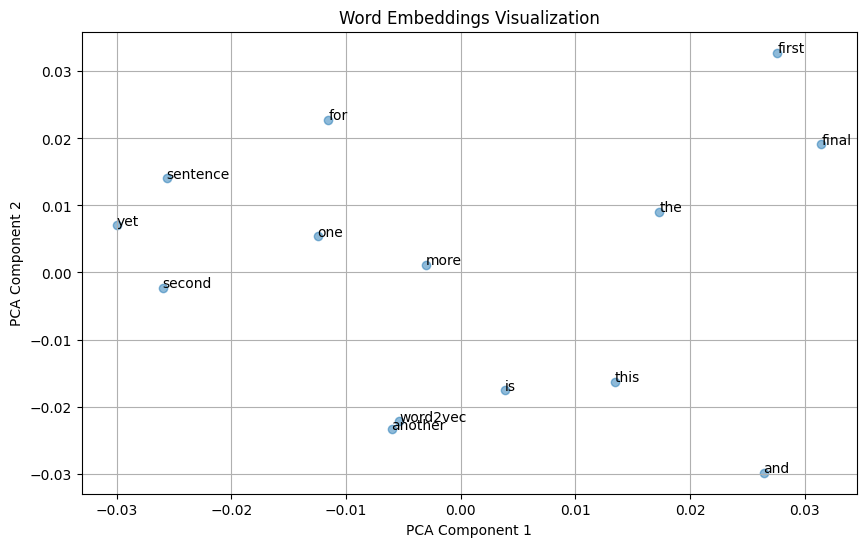

In [6]:
#b. Demonstrate word embeddings using word2vec
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample sentences
sentences = [
    ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Retrieve word vectors
word_vectors = model.wv

# Test the word vectors
similar_words = word_vectors.most_similar('sentence')
print("Most similar words to 'sentence':", similar_words)

# Visualize word embeddings using PCA
def plot_embeddings(words, vectors):
    # Fit PCA model on word vectors
    pca = PCA(n_components=2)
    result = pca.fit_transform(vectors)

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.scatter(result[:, 0], result[:, 1], alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('Word Embeddings Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# Get all words in the list
all_words = sum(sentences, [])
unique_words = list(set(all_words))

# Visualize embeddings for all words
word_vectors_to_visualize = [word_vectors[word] for word in unique_words]
plot_embeddings(unique_words, word_vectors_to_visualize)


In [7]:
#Implement Text classification using naïve bayes classifier and text blob library
import nltk
nltk.download('punkt')
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob
training_corpus = [
 ('I am exhausted of this work.', 'Class_B'),
 ("I can't cooperate with this", 'Class_B'),
 ('He is my badest enemy!', 'Class_B'),
 ('My management is poor.', 'Class_B'),
 ('I love this burger.', 'Class_A'),
 ('This is an brilliant place!', 'Class_A'),
 ('I feel very good about these dates.', 'Class_A'),
 ('This is my best work.', 'Class_A'),
 ("What an awesome view", 'Class_A'),
 ('I do not like this dish', 'Class_B')]
test_corpus = [
 ("I am not feeling well today.", 'Class_B'),
 ("I feel brilliant!", 'Class_A'),
 ('Gary is a friend of mine.', 'Class_A'),
 ("I can't believe I'm doing this.", 'Class_B'),
 ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')]
model = NBC(training_corpus)
print(model.classify("Their codes are amazing."))
print(model.classify("I don't like their computer."))
print(model.accuracy(test_corpus))

Class_A
Class_B
0.8333333333333334


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
